In [1]:
import sys
import os
sys.path.append(os.path.abspath('../..'))




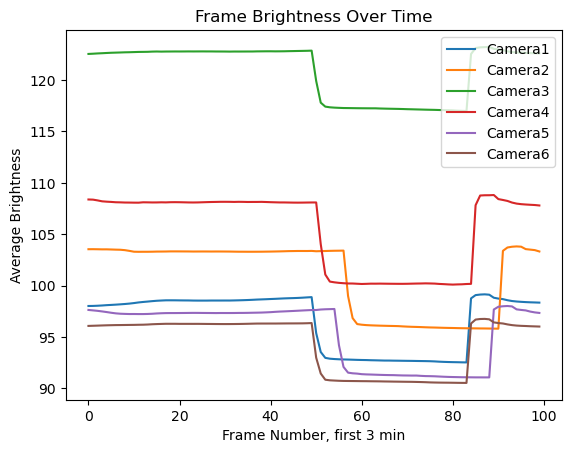

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24: {'Camera1': [50], 'Camera2': [57, 58], 'Camera3': [50, 51], 'Camera4': [51, 52], 'Camera5': [55, 56], 'Camera6': [50]}
Processed drop frames: {'Camera1': 50, 'Camera2': 58, 'Camera3': 51, 'Camera4': 52, 'Camera5': 56, 'Camera6': 50}
50
alined data saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/df_synced_2social_mini_20241015pmcr2_single_AO_13_24_2024_11_07_2social_mini_20241015pmcr2_single_AO_13_24_calib_before_label3d_dannce.mat
Alignment successful for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24
Moved prior calibration file to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/prev_calib


True

In [5]:
from utlis.sync_utlis.sync_df_utlis import process_sync
# base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_03/20240819V1r2'
# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_18'
base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24'
process_sync(base_folder, threshold=2, max_frames=300, min_frame=200) #, min_frame=150 here the min frame will actually shift it which is not ideal, but it works, all we need is alignment so whatever...

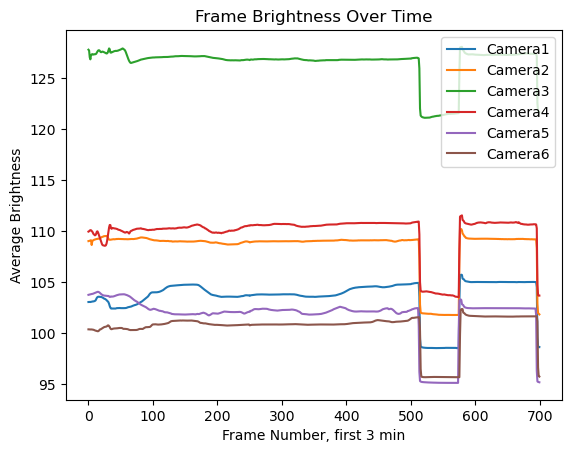

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03: {'Camera1': [514, 696], 'Camera2': [514, 696], 'Camera3': [514, 696], 'Camera4': [514, 696], 'Camera5': [513, 695], 'Camera6': [515, 697]}
Processed drop frames: {'Camera1': 514, 'Camera2': 514, 'Camera3': 514, 'Camera4': 514, 'Camera5': 513, 'Camera6': 515}
513
alined data saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03/df_synced_20240916v1r1_16_03_2024_10_08_20240916v1r1_16_03_calib_before_label3d_dannce.mat
Alignment successful for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03
Moved prior calibration file to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03/prev_calib


In [5]:
# List of base folders to process
base_folders = [
    # '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_22',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53'
    # Add more paths as needed
]

# Loop through each base folder and process it
for folder in base_folders:
    process_sync(folder, threshold=2, max_frames=700)


plotting com_traga for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128


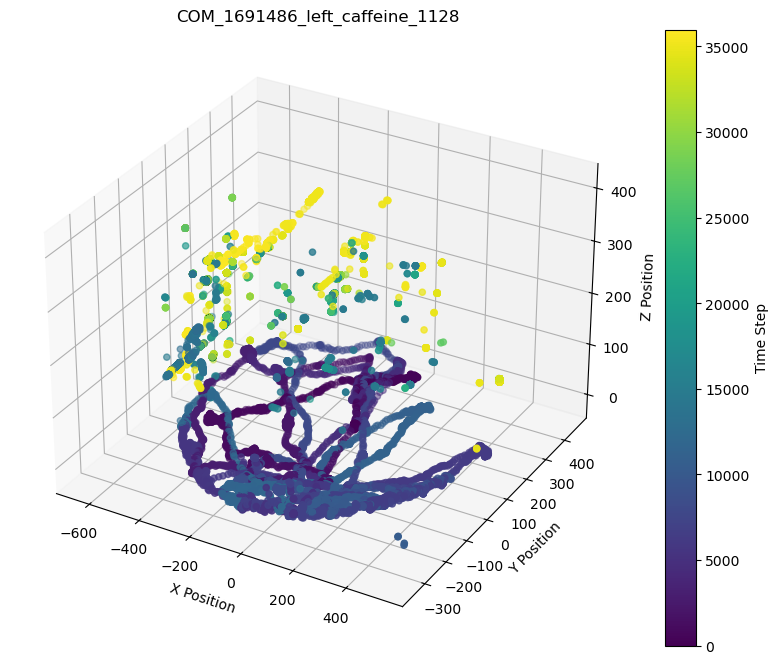

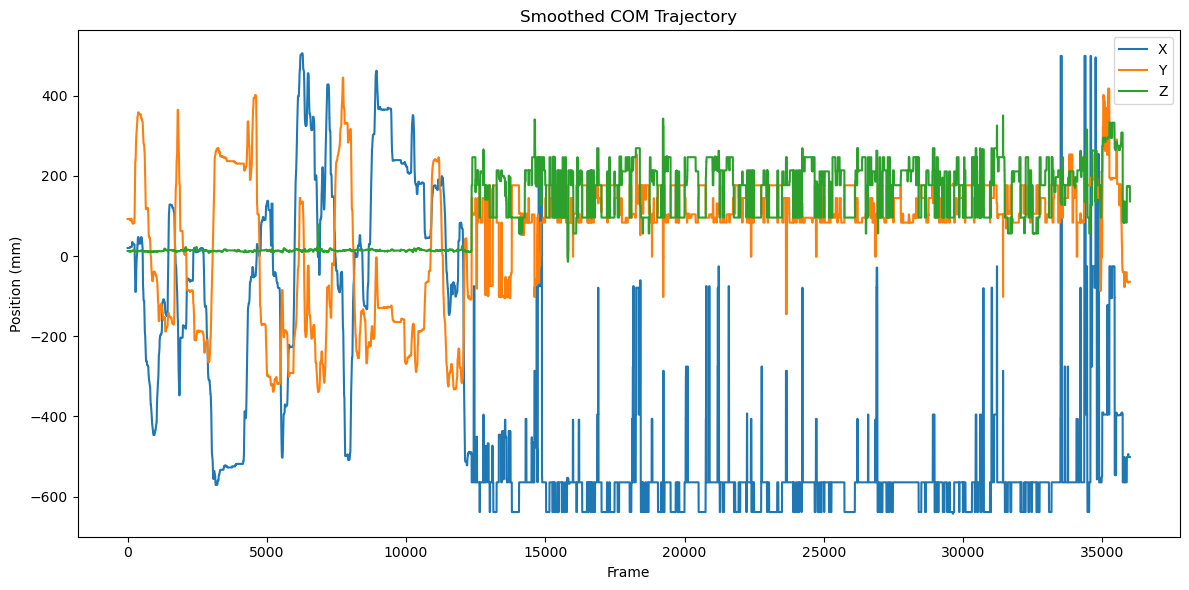

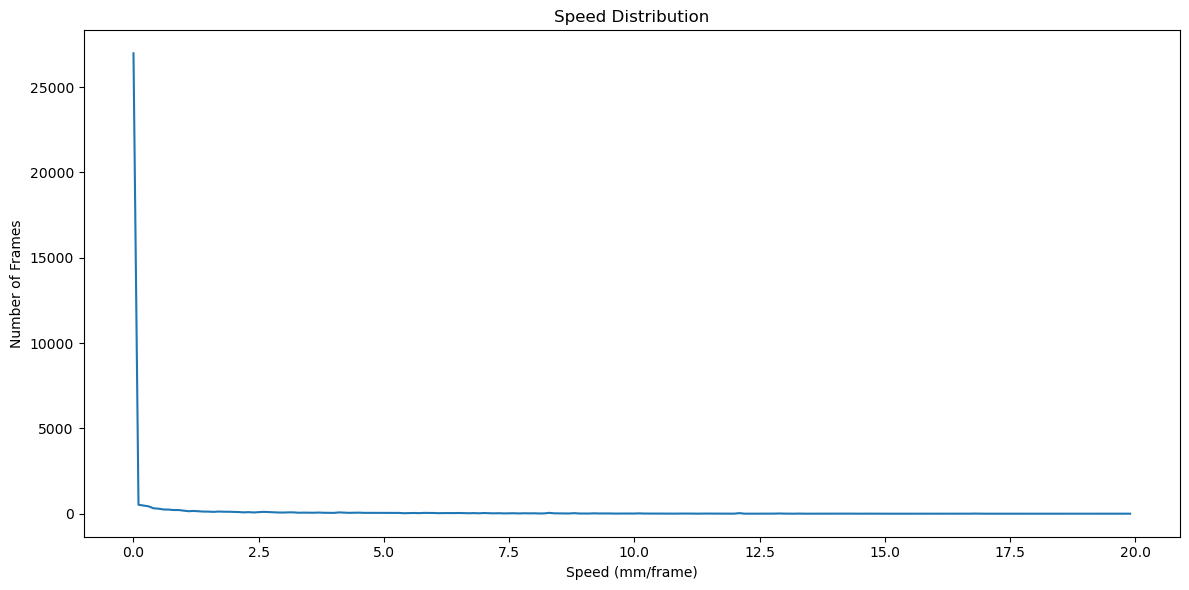

Analysis complete. Plots saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128/COM/predict00/vis


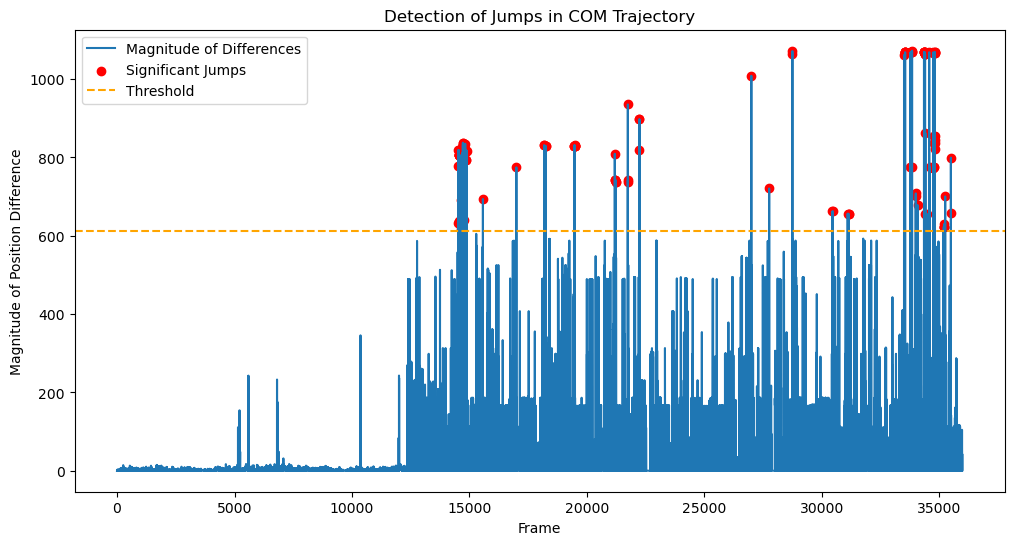

saved into npy. Frames with significant jumps: [14518 14519 14520 14552 14553 14555 14562 14563 14564 14568 14569 14573
 14574 14626 14631 14676 14677 14704 14707 14717 14721 14724 14725 14726
 14733 14735 14736 14737 14748 14757 14764 14765 14821 14854 14857 14858
 14859 14860 14866 14871 14872 14882 15574 16998 18180 18183 18241 18242
 19454 19455 19468 19474 19479 19480 19486 19489 21187 21209 21211 21215
 21219 21221 21743 21747 21748 22233 22236 22238 27000 27760 28748 28749
 30454 30472 31101 31137 31141 33500 33543 33545 33546 33547 33549 33770
 33780 33783 33784 33788 33789 33822 33824 33842 33844 33999 34009 34075
 34350 34358 34359 34370 34371 34380 34381 34388 34389 34394 34395 34404
 34406 34463 34572 34596 34745 34746 34752 34753 34754 34755 34756 34790
 34791 34795 34796 34797 34804 34807 34810 34811 34812 34813 34817 35195
 35198 35199 35200 35208 35252 35494 35496]
139
N_FRAMES 139
pred_2d 139


100%|██████████| 139/139 [03:39<00:00,  1.58s/it]


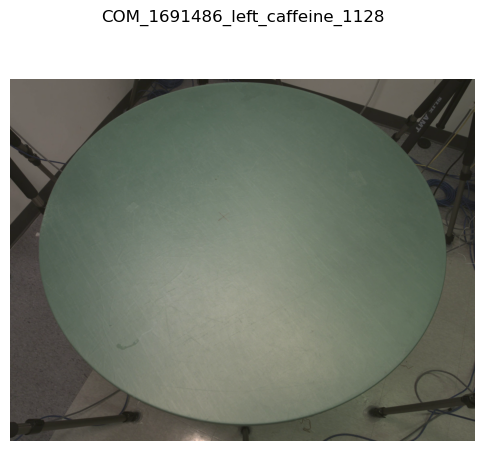

In [14]:
import sys
import os
sys.path.append(os.path.abspath('../..'))
from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_06/0cricket_test_2_14_00'
# '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_02/1691486_left_right_saline_1430'
base_folders = [
    '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128'
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17'
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_06/0cricket_test_2_14_00',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_04/20240916V1r2',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_13/240605pmc_righthole_acrylic_test_14_55'
    # '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_22',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53'
    # Add more paths as needed
]

# Loop through each base folder and process it
for base_folder in base_folders:
    plot_com_all(base_folder, perform_jump_indices=True, perform_video_generation=True) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False

plotting com_traga for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_27/1686941_left_right


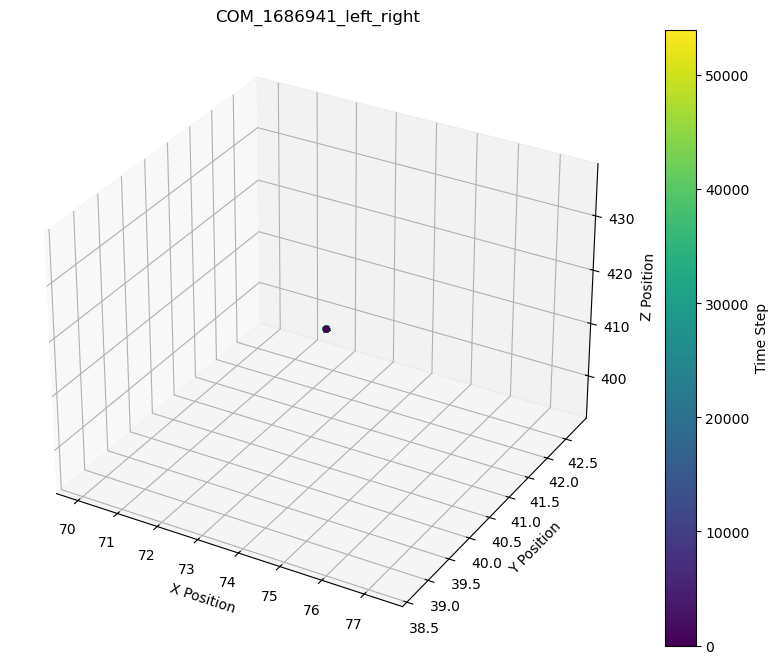

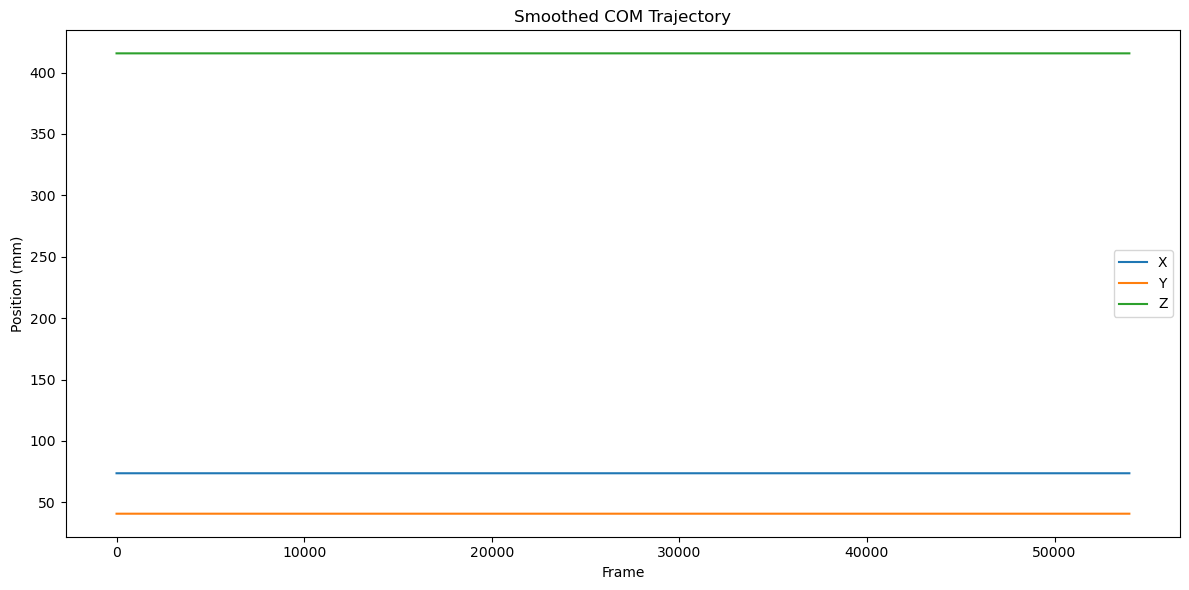

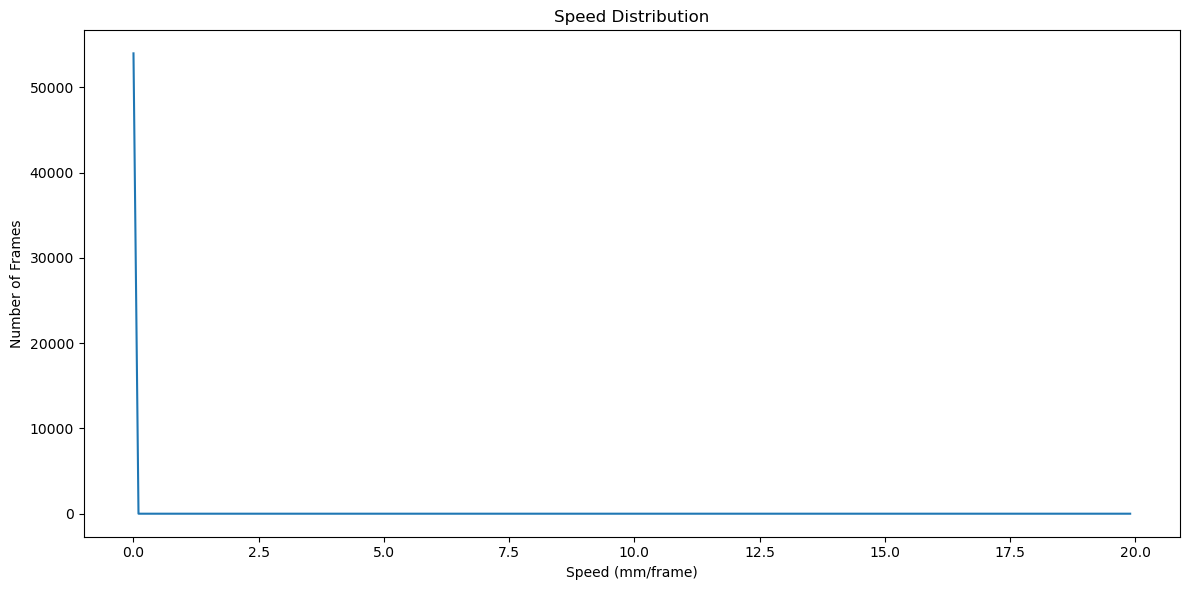

Analysis complete. Plots saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_27/1686941_left_right/COM/predict00/vis
plotting com_traga for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_08/1691486_no_hole_saline_1029


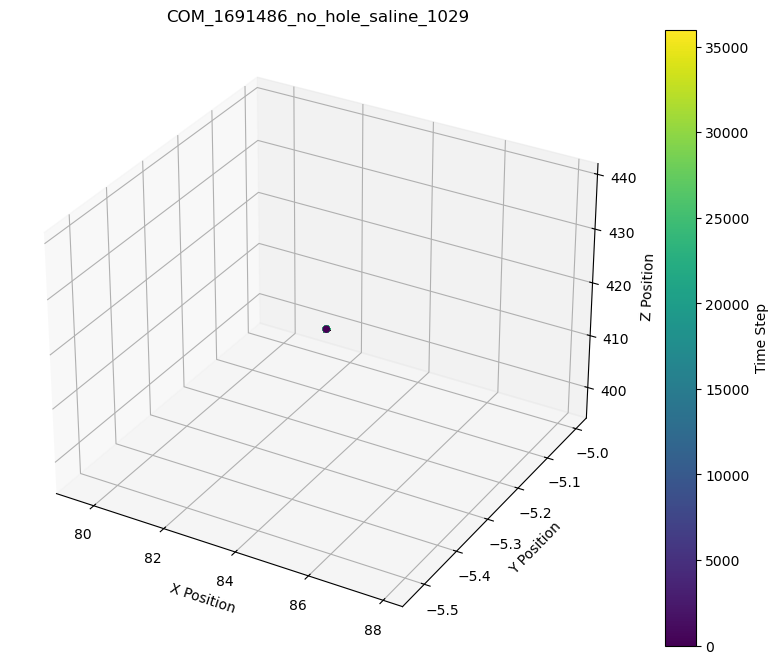

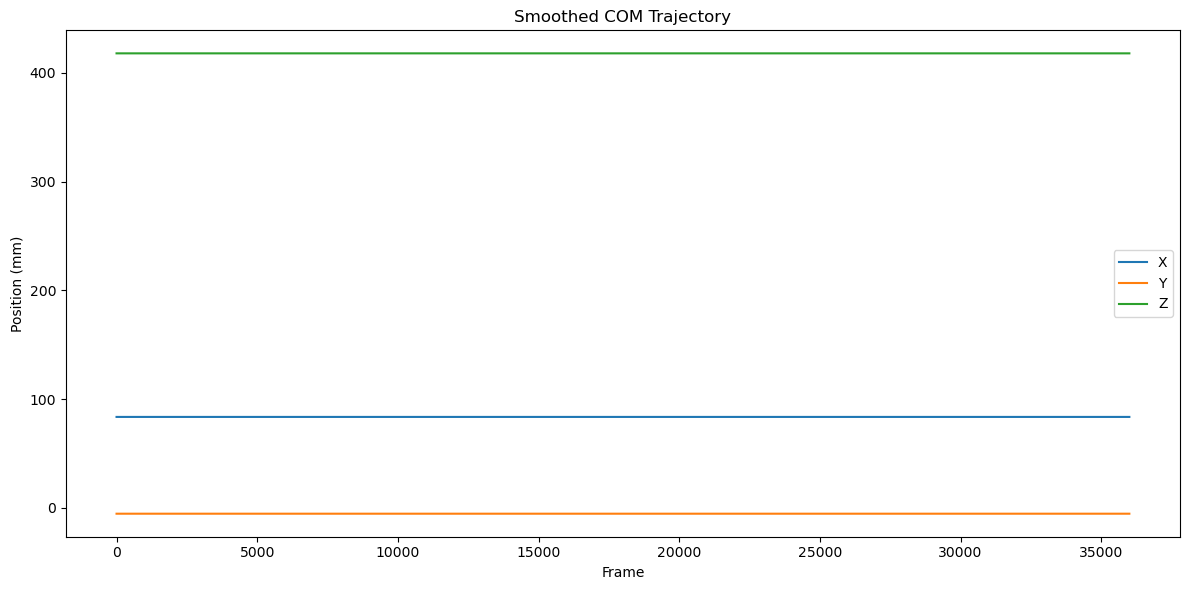

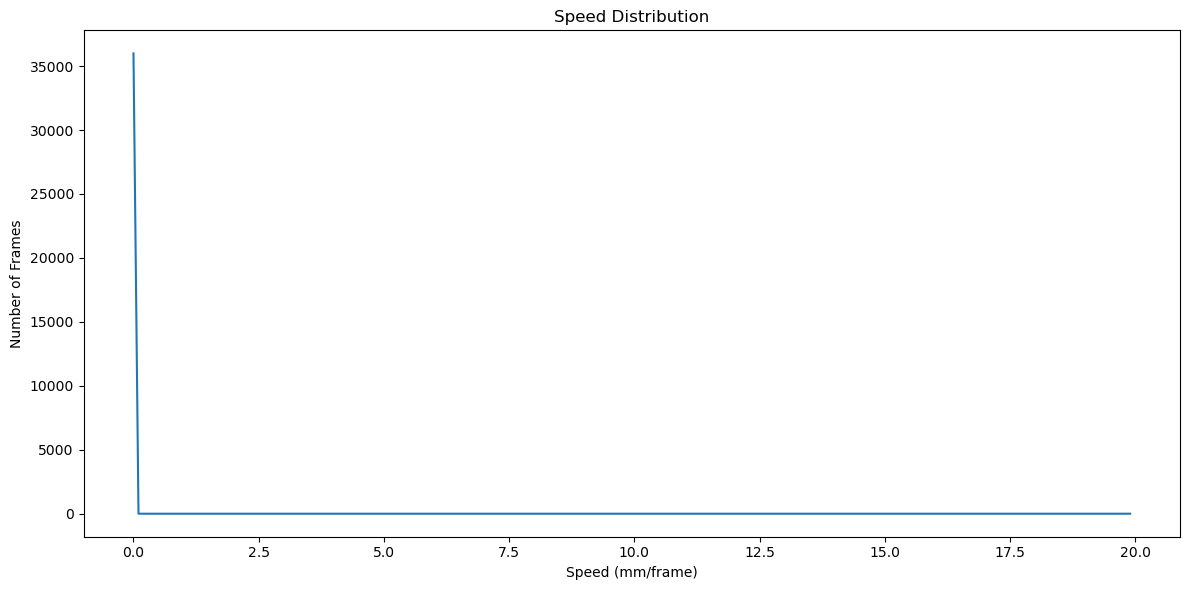

Analysis complete. Plots saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_08/1691486_no_hole_saline_1029/COM/predict00/vis
plotting com_traga for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128


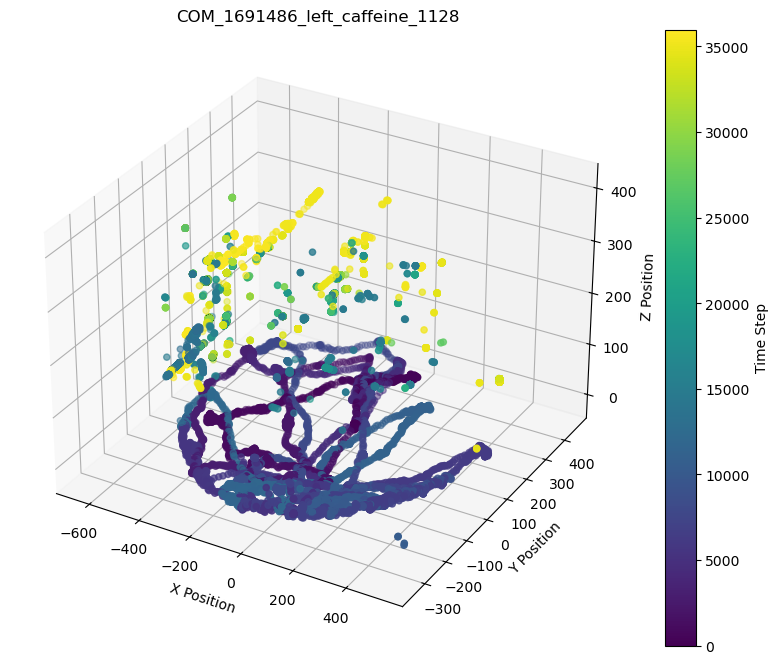

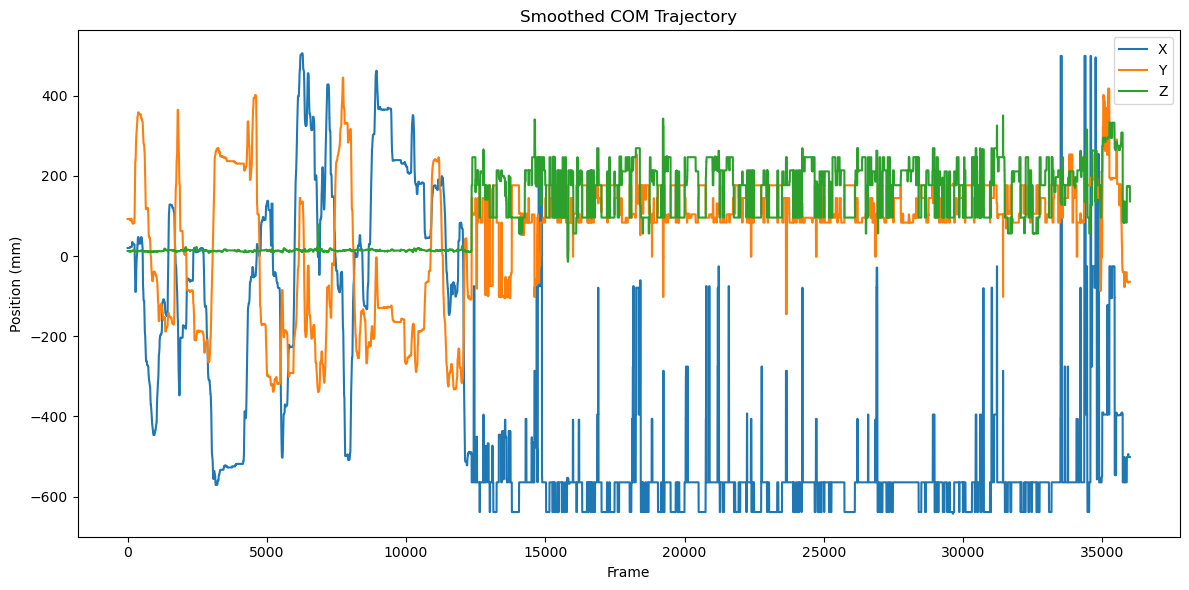

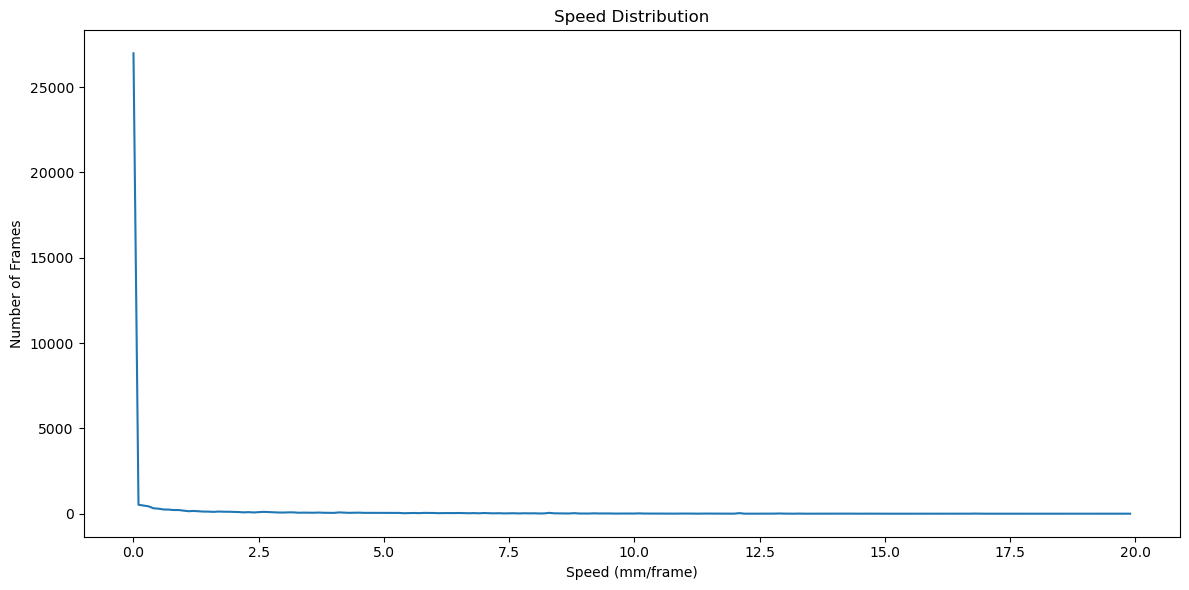

Analysis complete. Plots saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128/COM/predict00/vis


In [13]:
import sys
import os
sys.path.append(os.path.abspath('../..'))
from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# txt_file = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/1_point_com_rerun.txt"
txt_file = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/paret/com_1point_reruns.txt'  # Update this to the path of your .txt file
# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_02/1691486_left_right_saline_1430'
rel_paths_to_skip = set()
with open(txt_file, 'r') as f:
    for line in f:
        rel_path = line.strip()
        if rel_path:
            rel_paths_to_skip.add(rel_path)
            
for b in rel_paths_to_skip:
    plot_com_all(b) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../..'))
from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

# txt_file = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/1_point_com_rerun.txt"
# txt_file = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/paret/com_1point_reruns.txt'  # Update this to the path of your .txt file
# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_02/1691486_left_right_saline_1430'
rel_paths_to_skip = set()
with open(txt_file, 'r') as f:
    for line in f:
        rel_path = line.strip()
        if rel_path:
            rel_paths_to_skip.add(rel_path)
            
for b in rel_paths_to_skip:
    plot_com_all(b) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False

In [15]:
dry_run = False 
txt_file = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/paret/com_1point_reruns.txt"
# txt_file = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/1_point_com_rerun.txt"
slurm_launch_file = '/hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py'

# def check_expdir(expdir):
#     if not os.path.exists(expdir):
#         print(f"Skipping: Experiment directory {expdir} does not exist")
#         return None  # Return None or skip processing this directory
#     return expdir


# Function to create the full expdir path and print the command for dry-run
def run_command(expdir_path, partition, dry_run=True):
    # expdir_path = os.path.join(base_path, date_folder, rec_file)
    
    # Check if the experiment directory exists before running the command
    # if check_expdir(expdir_path) is None:
    #     return  # Skip this execution if the directory does not exist
    
    # command = f"python {slurm_launch_file} --expdir {expdir_path} --predict_com"
    command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_com --allow_overwrite --partition {partition}" # --allow_overwrite remove allow_overwrite by default.

    if dry_run:
        print(f"[DRY-RUN] Command: {command}")
    else:
        print(f"Executing command: {command}")
        os.system(command)
# Read the experiment directories from the .txt file and execute the command for each
with open(txt_file, 'r') as f:
    for line in f:
        expdir_path = line.strip()
        if not expdir_path:
            continue  # Skip empty lines
        # expdir_path = os.path.join(base_path, relative_path)
        run_command(expdir_path, 'tdunn',dry_run)

Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_08/20240628_PMC_r1_11_26 --predict_com --allow_overwrite --partition tdunn
Specified a single expdir; running predictions ...
Running command:  cd /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_08/20240628_PMC_r1_11_26
dannce predict com /hpc/group/tdunn/tqxli/sdannce_scripts/configs/com_mouse_config.yaml --com-predict-weights=/hpc/group/tdunn/tqxli/sdannce_scripts/weights/COM/checkpoint-epoch20.pth --com-predict-dir=COM/predict00 --max-num-samples 100000 --batch-size=1
Slurm out: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_08/20240628_PMC_r1_11_26/slurm/predict_com_20240628_PMC_r1_11_26.out
Submitted batch job 19581374

Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rig

In [ ]:
dry_run = False 
txt_file = "//hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/paret/dannce_return.txt"
# txt_file = 
slurm_launch_file = '/hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py'

# def check_expdir(expdir):
#     if not os.path.exists(expdir):
#         print(f"Skipping: Experiment directory {expdir} does not exist")
#         return None  # Return None or skip processing this directory
#     return expdir


# Function to create the full expdir path and print the command for dry-run
def run_command(expdir_path, partition, dry_run=True):
    # expdir_path = os.path.join(base_path, date_folder, rec_file)
    
    # Check if the experiment directory exists before running the command
    # if check_expdir(expdir_path) is None:
    #     return  # Skip this execution if the directory does not exist
    
    # command = f"python {slurm_launch_file} --expdir {expdir_path} --predict_com"
    command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_dannce --allow_overwrite --partition {partition}" # --allow_overwrite remove allow_overwrite by default.

    if dry_run:
        print(f"[DRY-RUN] Command: {command}")
    else:
        print(f"Executing command: {command}")
        os.system(command)
# Read the experiment directories from the .txt file and execute the command for each
with open(txt_file, 'r') as f:
    for line in f:
        expdir_path = line.strip()
        if not expdir_path:
            continue  # Skip empty lines
        # expdir_path = os.path.join(base_path, relative_path)
        run_command(expdir_path, 'tdunn',dry_run)

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../..'))
# from utlis.vis_valid_utlis.com_trag_updated import generate_dannce_vid_seq

base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_10/1691485_left_hole_saline_11_10'
dannce_vis_script = '/hpc/group/tdunn/lq53/BBOP/utlis/vis_valid_utlis/dannce_vid.py'
# generate_dannce_vid_seq(base_folder)
def run_command(base_folder, dry_run=True):
    command = f"conda run -n BBOP python {dannce_vis_script} {base_folder} "
    
    if dry_run:
        print(f"[DRY-RUN] {command}")
    else:
        os.system(command)

run_command(base_folder, dry_run=False)

Traceback (most recent call last):
  File "/hpc/group/tdunn/lq53/BBOP/utlis/vis_valid_utlis/dannce_vid.py", line 174, in <module>
    main(base_folder)
  File "/hpc/group/tdunn/lq53/BBOP/utlis/vis_valid_utlis/dannce_vid.py", line 43, in main
    COLOR = connectivity.COLOR_DICT[ANIMAL]
NameError: name 'connectivity' is not defined

ERROR conda.cli.main_run:execute(47): `conda run python /hpc/group/tdunn/lq53/BBOP/utlis/vis_valid_utlis/dannce_vid.py /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_10/1691485_left_hole_saline_11_10` failed. (See above for error)


In [12]:
predict_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17'
def run_command(expdir_path, partition, dry_run=True):
    # expdir_path = os.path.join(base_path, date_folder, rec_file)
    
    # Check if the experiment directory exists before running the command
    # if check_expdir(expdir_path) is None:
    #     return  # Skip this execution if the directory does not exist
    
    # command = f"python {slurm_launch_file} --expdir {expdir_path} --predict_com"
    command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_dannce --partition {partition}" # --allow_overwrite remove allow_overwrite by default.

    if dry_run:
        print(f"[DRY-RUN] Command: {command}")
    else:
        print(f"Executing command: {command}")
        os.system(command)

run_command(predict_path, 'tdunn', False)


Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17 --predict_dannce --partition tdunn
Specified a single expdir; running predictions ...
Running predictions on 1 experiments ...
Running command:  cd /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17
dannce predict dannce /hpc/group/tdunn/tqxli/sdannce_scripts/configs/dannce_mouse_config.yaml --dannce-predict-model=/hpc/group/tdunn/tqxli/sdannce_scripts/weights/DANNCE/train04_20241111_ft_mouse_demo/checkpoint-epoch60.pth --dannce-predict-dir=DANNCE/predict00 --com-file=COM/predict00/com3d0.mat --max-num-samples 100000 --batch-size=1
Slurm out: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17/slurm/predict_dannce_20240910v1r_cricket_cyliner_test_16_17.out
Submitted 

In [ ]:
import os
import glob

def delete_jpg_files(base_folder):
    for root, dirs, files in os.walk(base_folder):
        # Check if the current directory ends with 'DANNCE/predict00/vis'
        if root.endswith('DANNCE/predict00/vis'):
            # Get all .jpg files in the current directory
            jpg_files = glob.glob(os.path.join(root, '*.jpg'))
            for jpg_file in jpg_files:
                try:
                    os.remove(jpg_file)
                    print(f"Deleted: {jpg_file}")
                except Exception as e:
                    print(f"Failed to delete {jpg_file}: {e}")

base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ'
delete_jpg_files(base_folder)

Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_right_habituation/DANNCE/predict00/vis/2024_07_03_1691486_left_right_habituation.jpg
Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_right_caffeine_1448/DANNCE/predict00/vis/2024_07_03_1691486_left_right_caffeine_1448.jpg
Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1051/DANNCE/predict00/vis/2024_07_03_1691486_left_caffeine_1051.jpg
Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_right_caffeine_1546/DANNCE/predict00/vis/2024_07_03_1691486_left_right_caffeine_1546.jpg
Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr1/DANNCE/predict00/vis/2024_08_26_20240717_PMCr1.jpg
Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr2/DANNCE/predict00/vis/2024_08_26_20240717_PMCr2.jpg
Deleted: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_08/

In [12]:
# check if there is multi files.
# import glob
# import os
# from collections import defaultdict

# # Define the path where the files are located
# folder_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ'

# # Use glob to match the pattern
# files = glob.glob(f"{folder_path}/*/*/*label3d_dannce.mat")

# # Group files by their directory
# directory_files = defaultdict(list)
# for file in files:
#     directory = os.path.dirname(file)
#     directory_files[directory].append(file)

# # Print directories with multiple files
# for directory, files_in_dir in directory_files.items():
#     if len(files_in_dir) > 1:
#         print(f"Directory '{directory}' has multiple files:")
#         for file in files_in_dir:
#             print(f"  {file}")
#     # else:
#         # print(f"{directory} does note have multi files. all good.")

In [2]:
# def rough_bundle_sync(base_path, dates, threshold=3, max_frames=500, stepmax_frame = 1000):
#     missing_folders = []
#     successful_folders = []

#     for date in dates:
#         date_path = os.path.join(base_path, date)
#         if not os.path.exists(date_path):
#             print(f"Date folder {date_path} does not exist. Skipping.")
#             continue

#         calib_file = find_calib_file(date_path)
#         print("find calib files", calib_file)
#         if not calib_file:
#             print(f"No calibration file found in {date_path}. Skipping.")
#             continue

#         calib_nammm = os.path.basename(calib_file)
#         # print(calib_nammm)

#         for folder_name in os.listdir(date_path):
#             folder_path = os.path.join(date_path, folder_name)

#             if os.path.isdir(folder_path) and folder_name[0].isdigit():
#                 save_path = os.path.join(folder_path, f'df_synced_{folder_name}_{calib_nammm}') #f'pos_synced_{folder_name}_{calib_nammm}'
#                 vi_path = os.path.join(folder_path, 'videos')

#                 drop_frames = process_videos(vi_path, threshold, max_frames)
#                 print(f"Detected intensity drop frames in {folder_name}:", drop_frames)

#                 if any(len(frames) == 0 for frames in drop_frames.values()):
#                     missing_folders.append(folder_path)
#                     print(f"Skipping process_calibration_data for {folder_name} due to missing drop frames")
#                 else:
#                     successful_folders.append(folder_path)
#                     align_frames(calib_file, drop_frames, save_path)
#                     # update_calib(calib_file, drop_frames, save_path)
#                     # print('h')

#     print('Missing folders:', missing_folders)
#     return missing_folders, successful_folders

In [ ]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z

# # base_path = 'G:/Videos/6cam/lq53/2024_09_16_test_chris_new/'
# # calib_path = os.path.join(base_path, 'calib_before_3/chris_new/')
# # vid_path = 'rec_test_1'
# # output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# # mir_generate_param_z(base_path, calib_path, vid_path, output_file)

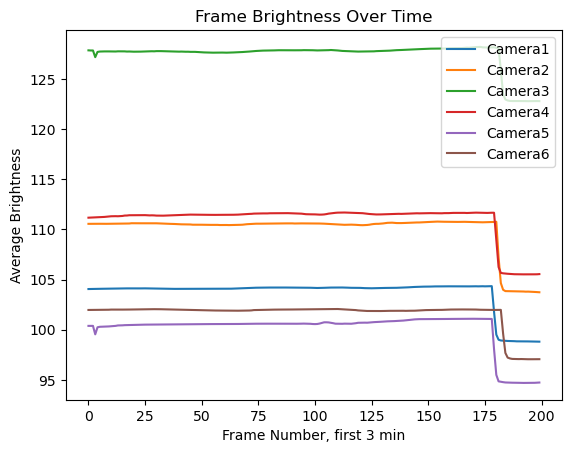

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr1: {'Camera1': [179, 180], 'Camera2': [181, 182], 'Camera3': [182, 183], 'Camera4': [180, 181], 'Camera5': [179, 180], 'Camera6': [183]}
Processed drop frames: {'Camera1': 180, 'Camera2': 182, 'Camera3': 183, 'Camera4': 181, 'Camera5': 180, 'Camera6': 183}
180
1
> /hpc/group/tdunn/lq53/BBOP/utlis/sync_utlis/sync_df_utlis.py(146)align_frames()
    144         pdb.set_trace()
    145 
--> 146         print(sync[cam_idx][0][keyyyyy])
    147         data_frame = sync[cam_idx][0][keyyyyy][0][0][0]
    148         print(2)

[]
Error during alignment: index 0 is out of bounds for axis 0 with size 0


False

In [2]:
# # base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/20240707-PMC-r1'

# process_sync(base_folder, threshold=2, max_frames=200)

In [4]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29'
# calib_path = os.path.join(base_path, 'z_updated_hires')
# vid_path = '20240717_PMCr2'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27900
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2/z_updated_hires_label3d_dannce.mat


True

In [7]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26'
# calib_path = os.path.join(base_path, 'z_updated_hires')
# vid_path = '20240730_PMCr2'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27900
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240730_PMCr2/z_updated_hires_label3d_dannce.mat


True

In [2]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18'
# calib_path = os.path.join(base_path, 'calib_before_13_17')
# vid_path = '20240707-PMC-r1'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27300
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/20240707-PMC-r1/calib_before_13_17_label3d_dannce.mat


True

In [ ]:
# single drop frame handlers.
# from utlis.sync_utlis.dropf_handler import drop_frame_handler

# df_dh = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_08/1691486_no_hole_saline_1029'
# drop_frame_handler(df_dh)

Loaded frametimes for Camera1
Loaded frametimes for Camera2
Loaded frametimes for Camera3
Loaded frametimes for Camera4
Loaded frametimes for Camera5
Loaded frametimes for Camera6
Maximum shapes for each camera: {'Camera1': 191, 'Camera2': 190, 'Camera3': 190, 'Camera4': 191, 'Camera5': 190, 'Camera6': 190}
max frame number 5703.018783360001
Aligned data for Camera1 with 5704 entries.
Aligned data for Camera2 with 5704 entries.
Aligned data for Camera3 with 5704 entries.
Aligned data for Camera4 with 5704 entries.
Aligned data for Camera5 with 5704 entries.
Aligned data for Camera6 with 5704 entries.
[2.0000e+00 3.0000e+00 4.0000e+00 ... 3.5998e+04 3.5999e+04 3.6000e+04]
[1.0000e+00 2.0000e+00 3.0000e+00 ... 3.5997e+04 3.5998e+04 3.5999e+04]
[1.0000e+00 2.0000e+00 3.0000e+00 ... 3.5997e+04 3.5998e+04 3.5999e+04]
[2.0000e+00 3.0000e+00 4.0000e+00 ... 3.5998e+04 3.5999e+04 3.6000e+04]
[1.0000e+00 2.0000e+00 3.0000e+00 ... 3.5997e+04 3.5998e+04 3.5999e+04]
[1.0000e+00 2.0000e+00 3.0000e+0